In [1]:
from graph import DiffusionGraph, gigraphe, line, plane
from boundary_cond import fixed_temp, heater, heater_thermostat
from harmonic import harmonic_response, bode_diagram
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

Température en fonction du temps

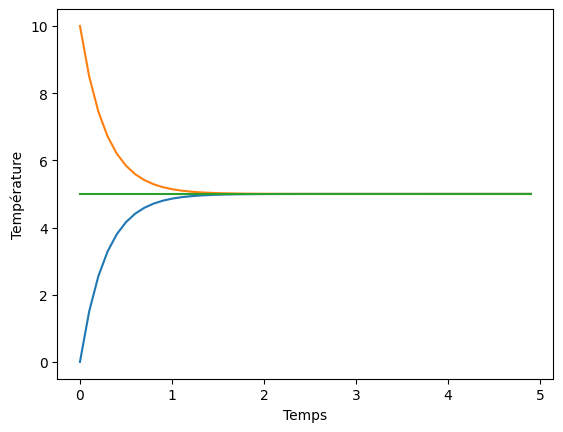

In [4]:
%matplotlib inline

g = DiffusionGraph(
    n=3,
    C=np.array([1, 1, 1]),
    G=np.array([
        [0, 1, 1],
        [1, 0, 1],
        [1, 1, 0],
    ]),
)

g.plot_temp(
    t_start=0,
    t_end=5,
    dt=0.1,
    initial=np.array([0, 10, 5])
)
# plt.savefig("figures/triangle_temp")
plt.show()

Diffusion pure, graphe quelconque

In [2]:
g = gigraphe
anim = g.animate(
    t_start=0,
    t_end=20,
    dt=0.1,
    initial=np.random.uniform(0, 10, g.n),
)
# anim.save("figures/gigraphe_thermique.gif")
plt.show()

<IPython.core.display.Javascript object>

Diffusion pure, graphe ligne

In [ ]:
n=5
g = line(n, cap=1, cond=0.25)
anim = g.animate(
    t_start=0,
    t_end=20,
    dt=0.1,
    initial=np.random.uniform(0, 10, g.n),
)
g.fig.set_size_inches(8, 4)
# anim.save("figures/line.gif")
plt.show()

Diffusion avec forçage sur le premier sommet, graphe ligne

In [ ]:
n=5
g = line(n, period=10)
anim = g.animate(
    t_start=0,
    t_end=30,
    dt=0.1,
    initial=np.linspace(-10, 10, n),
)
g.fig.set_size_inches(8, 4)
# anim.save("figures/line.gif")
plt.show()

Diffusion pure, graphe plan

In [ ]:
p, q = 5, 5
g = plane(p, q, cap=1, cond=0.1)
initial = np.random.uniform(-10, 10, (p, q))
anim = g.animate(
    t_start=0,
    t_end=15,
    dt=0.1,
    initial=initial.flatten(),
)
g.fig.set_size_inches(8, 8)
# anim.save("figures/plane.gif")
plt.show()

Diffusion avec forçage sur le sommet central, graphe plan

In [ ]:
p, q = 5, 5
g = plane(p, q)
g.boundary_conditions[p//2*5+q//2] = lambda gr, i: 10 * np.sin(2*np.pi/10*gr.t)
initial = np.random.uniform(-10, 10, (p, q))
anim = g.animate(
    t_start=0,
    t_end=15,
    dt=0.1,
    initial=initial.flatten(),
)
g.fig.set_size_inches(8, 8)
# anim.save("figures/plane.gif")
plt.show()

Température moyenne et écart quadratique moyen en diffusion pure

In [ ]:
g = gigraphe
t, U = g.simulate(
    t_start=0,
    t_end=20,
    dt=0.1,
    initial=np.random.uniform(0, 10, g.n),
)
mean_U = g.mean_temp(U)
msd_U = g.msd_temp(U)
fig, (ax1, ax2) = plt.subplots(2)
ax1.set_ylabel("Mean temperature")
ax1.plot(t, mean_U)
ax2.set_ylabel("Temperature mean\nstandard deviation")
ax2.set_xlabel("Time")
ax2.plot(t, msd_U)
plt.show()

Conductance négative

In [ ]:
g = DiffusionGraph(
    n=3,
    C=np.array([1, 1, 1]),
    G=0.1 * np.array([
        [0, 1, 1],
        [1, 0, -1],
        [1, -1, 0],
    ]),
    pos=np.array([[-1, 0], [0, 1], [1, 0]]),
)
anim = g.animate(
    t_start=0,
    t_end=20,
    dt=0.1,
    initial=np.array([0, 1, 2]),
)
plt.show()

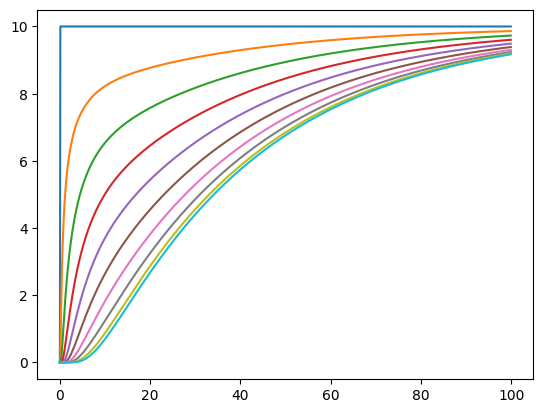

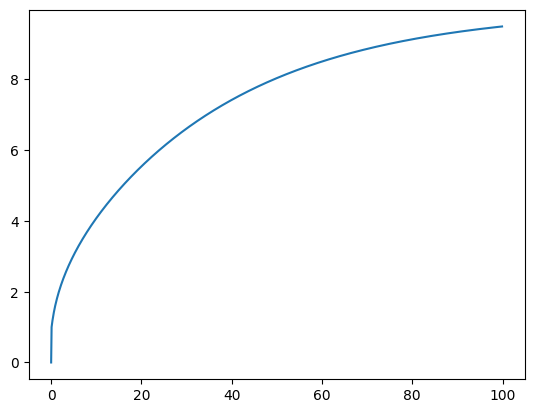

In [5]:
%matplotlib inline
g = line(10, 1, 1)
g.boundary_conditions[0] = fixed_temp(10)

t, U = g.simulate(
    t_start=0,
    t_end=100,
    dt=0.1,
    initial=np.zeros(g.n),
)
energy = g.mean_temp(U)
plt.plot(t, U.T)
plt.figure()
plt.plot(t, energy)
plt.show()